In [2]:
# autoreload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from our_mechanism import SliceQuantile
import numpy as np

EPS = 1.
M = 100
N = 1  # not necessary here
bound = (0, 2 ** 32)
g = 1
swap = False
mechanism = SliceQuantile(bound=bound, n=N, m=M, eps=EPS, split=0.5, swap=swap, g=g)

deltas = [10 ** (-i) for i in range(1, 32)]
min_gaps_w = []
min_gaps_h = []
for delta in deltas:
    w = mechanism.tree.high_prob_bound(delta)
    min_gaps_w.append(2 * w)
    min_gaps_h.append(2 * mechanism.h)

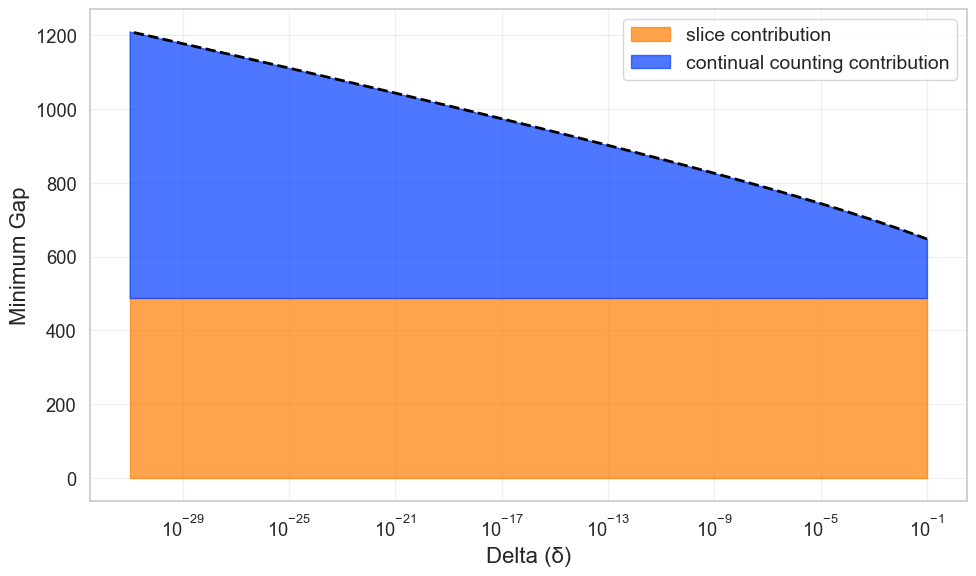

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set seaborn style
sns.set_theme(style="whitegrid")  # or try "white", "darkgrid", "dark", "ticks"
sns.set_context("notebook", font_scale=1.2)  # Adjusts default font sizes

deltas = np.array(deltas)
min_gaps_w = np.array(min_gaps_w)
min_gaps_h = np.array(min_gaps_h)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# First area (orange): from 0 to min_gaps_h
ax.fill_between(deltas, 0, min_gaps_h, color=sns.color_palette("bright")[1],
                alpha=0.7, label='slice contribution')

# Second area (blue): from min_gaps_h to min_gaps_h + min_gaps_w
ax.fill_between(deltas, min_gaps_h, min_gaps_h + min_gaps_w,
                color=sns.color_palette("bright")[0], alpha=0.7,
                label='continual counting contribution')

# Plot the boundary lines
ax.plot(deltas, min_gaps_h + min_gaps_w, color='black', linestyle='--', linewidth=2)

# Set logarithmic scale on x-axis
ax.set_xscale('log')

# Add labels and legend
ax.set_xlabel('Delta (δ)', fontsize=16)
ax.set_ylabel('Minimum Gap', fontsize=16)
ax.legend(loc='best', fontsize=14, frameon=True)

# Grid styling
ax.grid(True, alpha=0.3)

plt.tight_layout()
# save it as pdf
plt.savefig('min_gap_vs_delta.pdf', bbox_inches='tight', dpi=300)
plt.show()


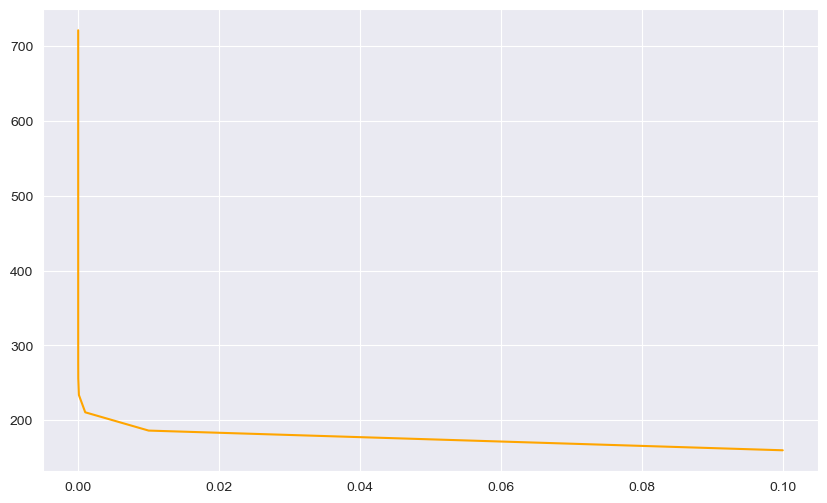

In [16]:
fig = plt.figure(figsize=(10, 6))
plt.plot(deltas, min_gaps_w, color='orange', label='slice contribution')
plt.show()